<a href="https://colab.research.google.com/github/rkolan-alt/UFC-Fight-Duration-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UFC Fight Duration Prediction**

# 1. Data Preprocessing

In [ ]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
#Creating the dataframe

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Classroom/large_dataset.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head(5)

,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
0,UFC Fight Night: Ribas vs. Namajunas,Amanda Ribas,Rose Namajunas,Blue,Women's Flyweight,0,Women,Decision - Unanimous,5,5.0,...,0.00,2.54,0.94,-0.11,-0.01,0.04,-0.02,0.26,0.2,0.69
1,UFC Fight Night: Ribas vs. Namajunas,Karl Williams,Justin Tafa,Red,Heavyweight,0,Men,Decision - Unanimous,3,3.0,...,-13.16,12.70,-1.22,-3.32,-0.02,0.50,0.13,0.50,0.2,4.75
2,UFC Fight Night: Ribas vs. Namajunas,Edmen Shahbazyan,AJ Dobson,Red,Middleweight,0,Men,KO/TKO,1,3.0,...,0.00,-2.54,-0.69,-1.22,0.06,-0.37,-0.01,-0.02,0.3,0.57
3,UFC Fight Night: Ribas vs. Namajunas,Payton Talbott,Cameron Saaiman,Red,Bantamweight,0,Men,KO/TKO,2,3.0,...,0.00,7.62,2.73,-0.60,0.08,-0.28,0.00,0.43,-0.2,-0.91
4,UFC Fight Night: Ribas vs. Namajunas,Billy Quarantillo,Youssef Zalal,Blue,Featherweight,0,Men,Submission,2,3.0,...,0.00,-5.08,4.48,3.84,0.07,-0.11,-0.22,0.01,-0.2,-1.04


In [ ]:
df.columns

Index(['event_name', 'r_fighter', 'b_fighter', 'winner', 'weight_class',
       'is_title_bout', 'gender', 'method', 'finish_round', 'total_rounds',
       'time_sec', 'referee', 'r_kd', 'r_sig_str', 'r_sig_str_att',
       'r_sig_str_acc', 'r_str', 'r_str_att', 'r_str_acc', 'r_td', 'r_td_att',
       'r_td_acc', 'r_sub_att', 'r_rev', 'r_ctrl_sec', 'r_wins_total',
       'r_losses_total', 'r_age', 'r_height', 'r_weight', 'r_reach',
       'r_stance', 'r_SLpM_total', 'r_SApM_total', 'r_sig_str_acc_total',
       'r_td_acc_total', 'r_str_def_total', 'r_td_def_total', 'r_sub_avg',
       'r_td_avg', 'b_kd', 'b_sig_str', 'b_sig_str_att', 'b_sig_str_acc',
       'b_str', 'b_str_att', 'b_str_acc', 'b_td', 'b_td_att', 'b_td_acc',
       'b_sub_att', 'b_rev', 'b_ctrl_sec', 'b_wins_total', 'b_losses_total',
       'b_age', 'b_height', 'b_weight', 'b_reach', 'b_stance', 'b_SLpM_total',
       'b_SApM_total', 'b_sig_str_acc_total', 'b_td_acc_total',
       'b_str_def_total', 'b_td_def_total', 'b_

In [ ]:
#Found null values after running the reverse order of df
df = df.dropna()

In [ ]:
df[['finish_round', 'total_rounds', 'time_sec']]

,finish_round,total_rounds,time_sec
0,5,5.0,300
1,3,3.0,300
2,1,3.0,273
3,2,3.0,21
4,2,3.0,110
...,...,...,...
7184,3,3.0,300
7207,5,5.0,300
7250,1,1.0,720
7263,1,1.0,44


In [ ]:
#Finding the target values
df['target'] = (df['finish_round'] -1)*300 + df['time_sec']

In [ ]:
# Preparing df to be in order to prepare the train, valid, and test datasets
df = df.iloc[::-1]

In [ ]:
df = df.reset_index()
df = df.drop(columns = ['index'], axis = 1)


#2. Feature Engineering

In [ ]:
old_df = df[:]

In [ ]:
#Found out the career stats of each fighter is constant in all their fights which isn't true. Also found out other key stats were missing.

old_df[old_df['r_fighter'] == 'Charles Oliveira'][['r_SLpM_total', 'r_SApM_total', 'r_sig_str_acc_total',
       'r_td_acc_total', 'r_str_def_total', 'r_td_def_total', 'r_sub_avg',
       'r_td_avg']]




,r_SLpM_total,r_SApM_total,r_sig_str_acc_total,r_td_acc_total,r_str_def_total,r_td_def_total,r_sub_avg,r_td_avg
1733,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32
2470,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32
3298,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32
3660,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32
3818,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32
3987,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32
4260,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32
4922,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32
5217,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32
5414,3.54,3.19,0.53,0.4,0.51,0.55,2.7,2.32


In [ ]:
#Creating new variables and replacing the names of the columns to standardize the naming format

df['r_ctrl_sec_total'] = df['r_ctrl_sec'][:]
df['b_ctrl_sec_total'] = df['b_ctrl_sec'][:]
df['r_kd_total'] = df['r_kd'][:]
df['b_kd_total'] = df['b_kd'][:]
df['r_sig_str_ab'] = df['b_sig_str'][:]
df['b_sig_str_ab'] = df['r_sig_str'][:]
df['r_sub_att_total'] = df['r_sub_att'][:]
df['b_sub_att_total'] = df['b_sub_att'][:]
df['r_td_att_total'] = df['r_td_att'][:]
df['b_td_att_total'] = df['b_td_att'][:]
df['r_str_def'] = df['b_sig_str_att'] - df['b_sig_str']
df['b_str_def'] = df['r_sig_str_att'] - df['r_sig_str']
df['r_td_def'] = df['b_td_att'] - df['b_td']
df['b_td_def'] = df['r_td_att'] - df['r_td']
dct = {'r_SLpM_total': 'r_sig_str_total','b_SLpM_total': 'b_sig_str_total','r_SApM_total': 'r_sig_ab_total','b_SApM_total': 'b_sig_ab_total','r_td_avg': 'r_td_total','b_td_avg': 'b_td_total'}
df[[val for val in dct.values()]] = df[[key for key in dct.keys()]]
df = df.drop(columns = [key for key in dct.keys()])

In [ ]:
#Creating 2d lists with the 2 variables in each list, the first variable is used to calculate the value of the second variable

red_features = [['r_kd', 'r_kd_total'], ['r_sig_str', 'r_sig_str_total'], ['r_sig_str_ab', 'r_sig_str_ab_total'], ['r_td_att', 'r_td_att_total'], ['r_sub_att', 'r_sub_att_total'], ['r_ctrl_sec', 'r_ctrl_sec_total'], ['r_sig_str_acc', 'r_sig_str_acc_total'], ['r_td_acc', 'r_td_acc_total'], ['r_td_def', 'r_td_def_total'], ['r_str_def', 'r_str_def_total']]
blue_features = [['b_kd', 'b_kd_total'], ['b_sig_str', 'b_sig_str_total'], ['b_sig_str_ab', 'b_sig_str_ab_total'], ['b_td_att', 'b_td_att_total'], ['b_sub_att', 'b_sub_att_total'], ['b_ctrl_sec', 'b_ctrl_sec_total'], ['b_sig_str_acc', 'b_sig_str_acc_total'], ['b_td_acc', 'b_td_acc_total'], ['b_td_def', 'b_td_def_total'], ['b_str_def', 'b_str_def_total']]

In [ ]:
#Method to re-evaluate the stats accurate to each fighter

def accurate_stats(dataframe, r_features, b_features, fighters):

  assert len(r_features) == len(b_features)

  for fighter in fighters:
    fighter_red, fighter_blue = dataframe[dataframe['r_fighter'] == fighter], dataframe[dataframe['b_fighter'] == fighter]
    indices = pd.concat([fighter_red, fighter_blue]).sort_index().index
    feature_length = len(r_features)

    for n in np.arange(feature_length):
        count = 0
        average = 0
        sum = 0
        for index in indices:
          count += 1
          if dataframe['r_fighter'].loc[index] == fighter:

            try:
              average = sum / (count - 1)
            except ZeroDivisionError:
              average = 0
            sum += dataframe.loc[index, r_features[n][0]]
            if count == 1:
              dataframe.loc[index, r_features[n][1]] = dataframe.loc[index, r_features[n][0]]
            else:
              dataframe.loc[index, r_features[n][1]] = average
          else:

            try:
              average = sum / (count - 1)
            except ZeroDivisionError:
              average = 0
            sum += dataframe.loc[index, b_features[n][0]]
            if count == 1:
              dataframe.loc[index, b_features[n][1]] = dataframe.loc[index, b_features[n][0]]
            else:
              dataframe.loc[index, b_features[n][1]] = average

  return dataframe






In [ ]:
def first_fight(dataframe, r_features, b_features, fighters):
  assert len(r_features) == len(b_features)

  for fighter in fighters:
    fighter_df = dataframe[(dataframe['r_fighter'] == fighter) | (dataframe['b_fighter'] == fighter)].sort_index()
    indices = fighter_df.index[1:]
    main_index = fighter_df.index[0]
    feature_length = len(r_features)

    if fighter_df.shape[0]>1:

      for n in np.arange(feature_length):
        sum = 0
        for index in indices:
          if dataframe.loc[index, 'r_fighter'] == fighter:
            sum += dataframe.loc[index, r_features[n]]
          else:
            sum += dataframe.loc[index, b_features[n]]

        if dataframe.loc[main_index, 'r_fighter'] == fighter:
          dataframe.loc[main_index, r_features[n]] = sum/fighter_df.shape[0]
        else:
          dataframe.loc[main_index, b_features[n]] = sum/fighter_df.shape[0]
    else:
      continue


  return dataframe





In [ ]:
df['r_avg_fight_time'] = df['target'][:]
df['b_avg_fight_time'] = df['target'][:]



In [ ]:
fighters_array = np.unique(np.concatenate([np.unique(df['r_fighter']), np.unique(df['b_fighter'])]))
len(fighters_array)

1812

In [ ]:
#Fixing the data

df = accurate_stats(df, red_features, blue_features, fighters_array)
df = first_fight(df, [feature[1] for feature in red_features], [feature[1] for feature in blue_features], fighters_array)

/tmp/ipython-input-666399315.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, r_features[n][1]] = average
/tmp/ipython-input-666399315.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.33333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, b_features[n][1]] = average
/tmp/ipython-input-666399315.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.3333333333333335' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, b_features[n][1]] = average
/tmp/ipython-input-666399315.py:39: FutureWarn

In [ ]:
#Creating the differnce metrics

red_totals = [feature[1] for feature in red_features]
blue_totals = [feature[1] for feature in blue_features]
final_features = [feature.strip('r_').replace('total', 'diff') for feature in red_totals]

for n in np.arange(len(final_features)):
  df[final_features[n]] = np.abs(df[red_totals[n]] - df[blue_totals[n]])

In [ ]:
#Creating X and y dataframes for three round and five round fights

df['reach_diff'] = np.abs(df['reach_diff'])

x_features = ['r_fighter', 'b_fighter', 'reach_diff', 'total_rounds'] + red_totals + blue_totals + final_features + ['target']


X= df[x_features]


three_rnd_X, five_rnd_X = X[X['total_rounds'] == 3.0].drop(['total_rounds'], axis = 1), X[X['total_rounds'] == 5.0].drop(['total_rounds'], axis = 1)





In [ ]:
three_rnd_fighters_array = np.unique(np.concatenate([np.unique(three_rnd_X['r_fighter']), np.unique(three_rnd_X['b_fighter'])]))

three_rnd_X = accurate_stats(three_rnd_X, [['target', 'r_avg_fight_time']], [['target', 'b_avg_fight_time']], three_rnd_fighters_array)
three_rnd_X = first_fight(three_rnd_X, ['r_avg_fight_time'], ['b_avg_fight_time'], three_rnd_fighters_array).drop(columns = ['r_fighter', 'b_fighter'])


three_rnd_X[['r_avg_fight_time', 'b_avg_fight_time']]

,r_avg_fight_time,b_avg_fight_time
4,623.329894,450.000000
5,331.419643,270.452381
6,255.655556,344.683333
9,683.400000,686.492857
11,789.486111,685.961281
...,...,...
6355,500.500000,165.000000
6356,694.666667,900.000000
6357,658.000000,710.750000
6358,501.888889,900.000000


In [ ]:
three_rnd_X['b_avg_fight_time'].max()

900.0

In [ ]:

three_rnd_X.isnull().sum().sum()

np.int64(0)

## 3. Machine Learning


In [ ]:
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
#starting with three_rnd_X

X_train, X_test = train_test_split(three_rnd_X, test_size = 0.2, random_state = 42)

In [ ]:
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)

In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 284.723	valid_1's rmse: 310.153
[200]	training's rmse: 266.149	valid_1's rmse: 307.408
[300]	training's rmse: 251.915	valid_1's rmse: 306.958
[400]	training's rmse: 239.524	valid_1's rmse: 306.961
[500]	training's rmse: 228.28	valid_1's rmse: 307.273
[600]	training's rmse: 217.974	valid_1's rmse: 307.699
[700]	training's rmse: 208.148	valid_1's rmse: 308.203
[800]	training's rmse: 198.987	valid_1's rmse: 308.458
[900]	training's rmse: 190.603	valid_1's rmse: 308.768
[1000]	training's rmse: 182.436	valid_1's rmse: 309.203
Did not meet early stopping. Best iteration is:
[312]	training's rmse: 250.272	valid_1's rmse: 306.749


In [ ]:
y_train = train_set.get_label()   # 1-D numpy array
y_valid = test_set.get_label()
baseline_rmse = np.sqrt(((y_valid - y_train.mean())**2).mean())
print("Baseline RMSE:", baseline_rmse)
print("y std (train):", np.std(y_train))

Baseline RMSE: 327.09744
y std (train): 320.3461


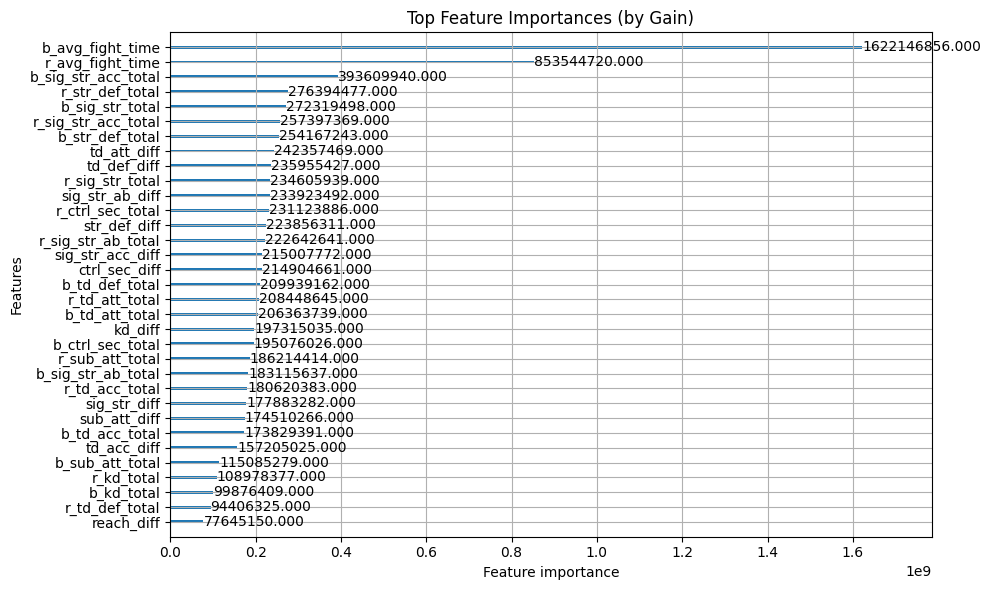

In [ ]:
lgb.plot_importance(lgb_model, max_num_features=35, importance_type='gain', figsize=(10, 6))
plt.title("Top Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

In [ ]:
three_rnd_X = three_rnd_X.join(df[['r_fighter', 'b_fighter', 'method']])
three_rnd_X['total_avg_time'] = (three_rnd_X['r_avg_fight_time'] + three_rnd_X['b_avg_fight_time'])/2
three_rnd_X['finish'] = [0 if 'decision' in str(m).lower() else 1 for m in three_rnd_X['method']]
three_rnd_X['r_finish_rate'] = three_rnd_X['finish']
three_rnd_X['b_finish_rate'] = three_rnd_X['finish']

In [ ]:


three_rnd_X = accurate_stats(three_rnd_X, [['finish', 'r_finish_rate']], [['finish', 'b_finish_rate']], three_rnd_fighters_array)
three_rnd_X = first_fight(three_rnd_X, ['r_finish_rate'], ['b_finish_rate'], three_rnd_fighters_array).drop(columns = ['r_fighter', 'b_fighter', 'finish', 'method'])

/tmp/ipython-input-666399315.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, b_features[n][1]] = average
/tmp/ipython-input-666399315.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[index, r_features[n][1]] = average


In [ ]:
three_rnd_X.columns

Index(['reach_diff', 'r_kd_total', 'r_sig_str_total', 'r_sig_str_ab_total',
       'r_td_att_total', 'r_sub_att_total', 'r_ctrl_sec_total',
       'r_sig_str_acc_total', 'r_td_acc_total', 'r_td_def_total',
       'r_str_def_total', 'b_kd_total', 'b_sig_str_total',
       'b_sig_str_ab_total', 'b_td_att_total', 'b_sub_att_total',
       'b_ctrl_sec_total', 'b_sig_str_acc_total', 'b_td_acc_total',
       'b_td_def_total', 'b_str_def_total', 'kd_diff', 'sig_str_diff',
       'sig_str_ab_diff', 'td_att_diff', 'sub_att_diff', 'ctrl_sec_diff',
       'sig_str_acc_diff', 'td_acc_diff', 'td_def_diff', 'str_def_diff',
       'target', 'b_avg_fight_time', 'r_avg_fight_time', 'total_avg_time',
       'r_finish_rate', 'b_finish_rate'],
      dtype='object')

In [ ]:
X_train, X_test = train_test_split(three_rnd_X, test_size = 0.2, random_state = 42)
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 278.34	valid_1's rmse: 302.464
[200]	training's rmse: 258.563	valid_1's rmse: 298.361
[300]	training's rmse: 243.868	valid_1's rmse: 296.791
[400]	training's rmse: 231.369	valid_1's rmse: 297.112
[500]	training's rmse: 219.991	valid_1's rmse: 297.339
[600]	training's rmse: 209.649	valid_1's rmse: 297.705
[700]	training's rmse: 199.937	valid_1's rmse: 297.545
[800]	training's rmse: 190.777	valid_1's rmse: 297.636
[900]	training's rmse: 182.641	valid_1's rmse: 298.178
[1000]	training's rmse: 174.566	valid_1's rmse: 298.294
Did not meet early stopping. Best iteration is:
[307]	training's rmse: 242.911	valid_1's rmse: 296.676


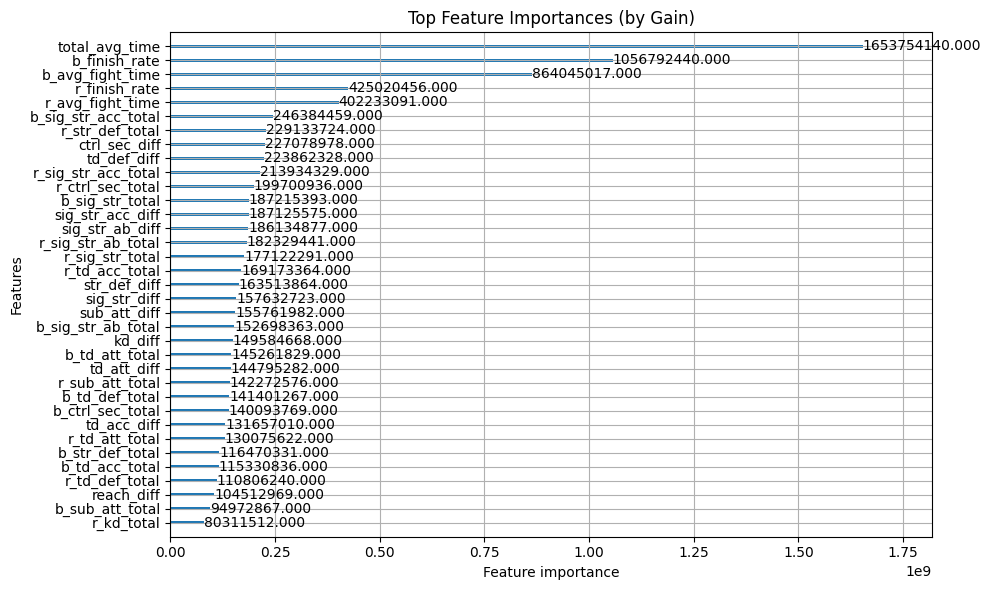

In [ ]:
#features related to time and finishes are key for model improvement, could average out the stats between red and blue and remove their individual stats

lgb.plot_importance(lgb_model, max_num_features=35, importance_type='gain', figsize=(10, 6))
plt.title("Top Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

In [ ]:
red_totals = red_totals + ['r_finish_rate']
blue_totals = blue_totals + ['b_finish_rate']

In [ ]:
average_stats = [feature.replace('_total', '_average').strip('r_') for feature in red_totals]
average_stats[-1] = average_stats[-1] + '_average'
average_stats

['kd_average',
 'sig_str_average',
 'sig_str_ab_average',
 'td_att_average',
 'sub_att_average',
 'ctrl_sec_average',
 'sig_str_acc_average',
 'td_acc_average',
 'td_def_average',
 'str_def_average',
 'finish_rate_average']

In [ ]:
def averages(three_rnd_X, red_totals, blue_totals, average_stats):
  for n in np.arange(len(average_stats)):
    three_rnd_X[average_stats[n]] = (three_rnd_X[red_totals[n]] + three_rnd_X[blue_totals[n]])/2


  return three_rnd_X

In [ ]:
three_rnd_X = averages(three_rnd_X, red_totals, blue_totals, average_stats)

In [ ]:
X_train, X_test = train_test_split(three_rnd_X, test_size = 0.2, random_state = 42)
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 277.758	valid_1's rmse: 302.117
[200]	training's rmse: 257.349	valid_1's rmse: 297.526
[300]	training's rmse: 242.065	valid_1's rmse: 296.436
[400]	training's rmse: 229.056	valid_1's rmse: 296.585
[500]	training's rmse: 217.381	valid_1's rmse: 297.038
[600]	training's rmse: 206.579	valid_1's rmse: 297.653
[700]	training's rmse: 196.454	valid_1's rmse: 297.626
[800]	training's rmse: 187.146	valid_1's rmse: 297.913
[900]	training's rmse: 178.466	valid_1's rmse: 298.395
[1000]	training's rmse: 170.064	valid_1's rmse: 298.648
Did not meet early stopping. Best iteration is:
[329]	training's rmse: 238.224	valid_1's rmse: 296.307


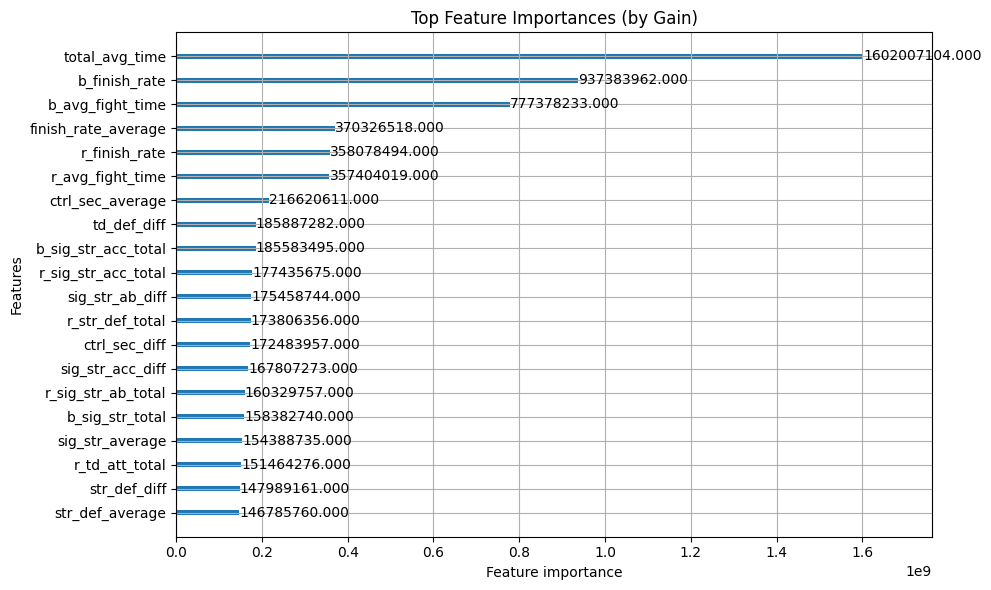

In [ ]:
lgb.plot_importance(lgb_model, max_num_features=20, importance_type='gain', figsize=(10, 6))
plt.title("Top Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

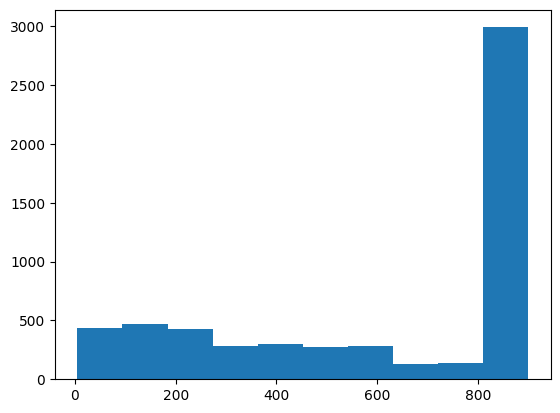

In [ ]:
#skewed distribution might be impacting model performance

plt.hist(three_rnd_X['target'])
plt.show()

In [ ]:
important_features = [
    "total_avg_time",
    "b_finish_rate",
    "b_avg_fight_time",
    "finish_rate_average",
    "r_finish_rate",
    "r_avg_fight_time",
    'target'

]

In [ ]:
X_train, X_test = train_test_split(three_rnd_X[important_features], test_size = 0.2, random_state = 42)
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)


Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 284.076	valid_1's rmse: 299.655
[200]	training's rmse: 272.331	valid_1's rmse: 295.733
[300]	training's rmse: 265.23	valid_1's rmse: 295.372
[400]	training's rmse: 259.548	valid_1's rmse: 295.713
[500]	training's rmse: 254.768	valid_1's rmse: 296.426
[600]	training's rmse: 250.422	valid_1's rmse: 297.123
[700]	training's rmse: 246.312	valid_1's rmse: 297.895
[800]	training's rmse: 242.6	valid_1's rmse: 298.356
[900]	training's rmse: 239.074	valid_1's rmse: 298.992
[1000]	training's rmse: 235.907	valid_1's rmse: 299.847
Did not meet early stopping. Best iteration is:
[251]	training's rmse: 268.304	valid_1's rmse: 295.234


In [ ]:
three_rnd_X = three_rnd_X.join(df['is_title_bout'])

In [ ]:
important_features.append('is_title_bout')

In [ ]:
X_train, X_test = train_test_split(three_rnd_X[important_features], test_size = 0.2, random_state = 42)
train_set = lgb.Dataset(X_train.drop(columns = ['target']), label = X_train['target'])
test_set = lgb.Dataset(X_test.drop(columns = ['target']), label = X_test['target'], reference = train_set)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, test_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=1000),
        lgb.log_evaluation(period=100)
    ]
)


Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 283.902	valid_1's rmse: 299.716
[200]	training's rmse: 272.198	valid_1's rmse: 295.931
[300]	training's rmse: 265.112	valid_1's rmse: 295.9
[400]	training's rmse: 259.433	valid_1's rmse: 296.436
[500]	training's rmse: 254.515	valid_1's rmse: 297.243
[600]	training's rmse: 250.074	valid_1's rmse: 297.882
[700]	training's rmse: 246.024	valid_1's rmse: 298.451
[800]	training's rmse: 242.119	valid_1's rmse: 298.84
[900]	training's rmse: 238.627	valid_1's rmse: 299.682
[1000]	training's rmse: 235.393	valid_1's rmse: 300.721
Did not meet early stopping. Best iteration is:
[247]	training's rmse: 268.502	valid_1's rmse: 295.608


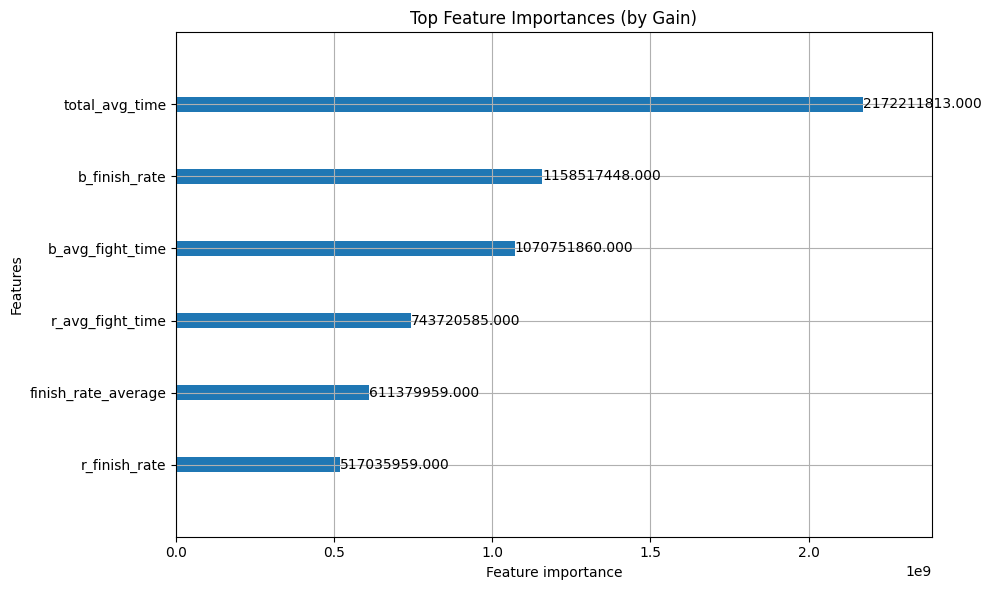

In [ ]:

lgb.plot_importance(lgb_model, max_num_features= 20, importance_type='gain', figsize=(10, 6))
plt.title("Top Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

In [ ]:
importance_df = pd.DataFrame({
    'feature': lgb_model.feature_name(),
    'importance': lgb_model.feature_importance(importance_type='gain')
})

print(importance_df.sort_values('importance', ascending=False))

               feature    importance
0       total_avg_time  2.172212e+09
1        b_finish_rate  1.158517e+09
2     b_avg_fight_time  1.070752e+09
5     r_avg_fight_time  7.437206e+08
3  finish_rate_average  6.113800e+08
4        r_finish_rate  5.170360e+08
6        is_title_bout  0.000000e+00


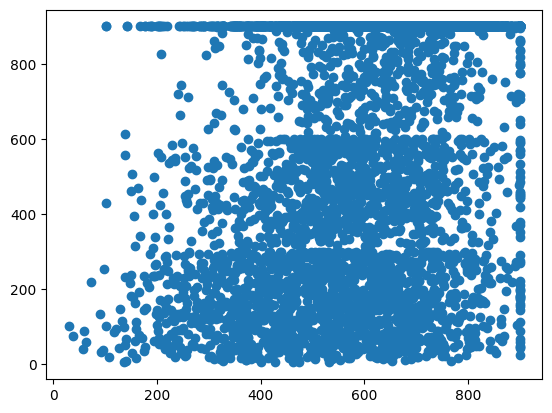

In [ ]:
plt.scatter(three_rnd_X['total_avg_time'], three_rnd_X['target'])

Further feature engineering wont improve the model by a lot as there has only been an improvement of 20 seconds from what I think were the most impactful features. This also means that fine tuning will probably not help the model much as the features aren't good enough to produce a good model. Regardless, I was able to learn about the importance of feature engineering and data cleaning in contructing a machine learning model.

In [ ]:
#Switching up to a classification task based on the number of rounds as it is more realistic

In [ ]:
three_rnd_X = three_rnd_X.drop(columns= ['target'])


In [ ]:
from xgboost import XGBClassifier

In [ ]:
three_rnd_X = three_rnd_X.join(df['finish_round'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(three_rnd_X.drop(columns = ['finish_round']),three_rnd_X['finish_round'],test_size=0.2,random_state = 42 )

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


In [ ]:
def to_zero_based_int(y):
    y = np.asarray(y).reshape(-1)
    y = y.astype(np.int32)
    y = y - y.min()
    return y

y_train = to_zero_based_int(y_train)

y_test  = to_zero_based_int(y_test)

In [ ]:
n_features = X_train.shape[1]

model = Sequential([
    tf.keras.Input(shape = (n_features, )),
    Dense(units = 128, activation= 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

model.compile(loss = SparseCategoricalCrossentropy(), optimizer = Adam(learning_rate = 1e-3))

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.0086
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8622
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3869
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4194
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3800
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1078
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3816
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0287
Epoch 9/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1008
Epoch 10/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0503
Epoch 11/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9995
Epoch 12/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9839
Epoch 13/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0198
Epoch 14/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9859
Epoch 15/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
y_pred = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
y_pred

array([[0.13615516, 0.11077357, 0.7530713 ],
       [0.30170166, 0.19575495, 0.5025434 ],
       [0.11359613, 0.18166542, 0.7047385 ],
       ...,
       [0.3037913 , 0.23082188, 0.46538678],
       [0.25596446, 0.14071594, 0.6033196 ],
       [0.1541838 , 0.03369419, 0.812122  ]], dtype=float32)

In [ ]:
y_pred_ids = y_pred.argmax(axis=1)

In [ ]:
y_pred_ids

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
y_test

array([0, 1, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_ids)

In [ ]:
accuracy

0.5884917175239756

In [ ]:
y_train

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
y_train_pred = model.predict(X_train)

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_train_pred = y_train_pred.argmax(axis=1)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.6271260357610118

In [ ]:
#Mild underfitting detected - bigger network needed

In [ ]:
n_features = X_train.shape[1]

model = Sequential([
    tf.keras.Input(shape = (n_features, )),
    Dense(units = 256, activation= 'relu'),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

model.compile(loss = SparseCategoricalCrossentropy(), optimizer = Adam(learning_rate = 1e-3))

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.4284
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1354
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0903
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0478
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0073
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0042
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9637
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9297
Epoch 9/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9300
Epoch 10/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9506
Epoch 11/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9371
Epoch 12/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9207
Epoch 13/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9175
Epoch 14/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9137
Epoch 15/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.argmax(axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
accuracy_score(y_test, y_test_pred)

0.5911072362685266

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred = y_train_pred.argmax(axis=1)

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
accuracy_score(y_train, y_train_pred)

0.6312690798081116

(array([1178.,    0.,    0.,    0.,    0.,  763.,    0.,    0.,    0.,
        2645.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

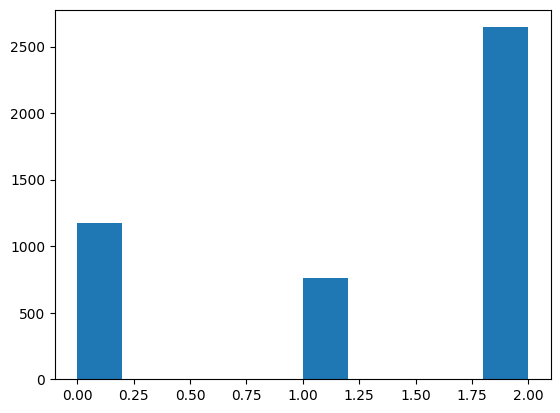

In [ ]:
plt.hist(y_train)

In [ ]:
#Need more data on rounds 1 and 2. Can be done through data augmentation

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



(array([2645.,    0.,    0.,    0.,    0., 2645.,    0.,    0.,    0.,
        2645.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

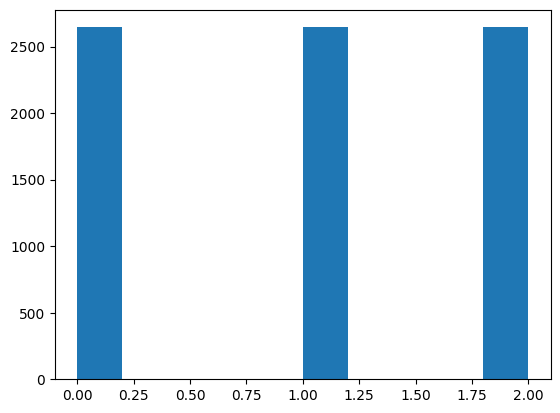

In [ ]:
plt.hist(y_train)

In [ ]:
n_features = X_train.shape[1]

model = Sequential([
    tf.keras.Input(shape = (n_features, )),
    Dense(units = 256, activation= 'relu'),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

model.compile(loss = SparseCategoricalCrossentropy(), optimizer = Adam(learning_rate = 1e-3))

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7947
Epoch 2/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1175
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1256
Epoch 4/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0885
Epoch 5/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0721
Epoch 6/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0638
Epoch 7/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0727
Epoch 8/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0597
Epoch 9/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0562
Epoch 10/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0456
Epoch 11/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0442
Epoch 12/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0453
Epoch 13/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0420
Epoch 14/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0512
Epoch 15/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred = y_train_pred.argmax(axis=1)
accuracy_score(y_train, y_train_pred)

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.7924385633270321

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.argmax(axis=1)
accuracy_score(y_test, y_test_pred)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.43679163034001744

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(three_rnd_X.drop(columns = ['finish_round']),three_rnd_X['finish_round'],test_size=0.2,random_state = 42 )

In [ ]:
#Data augmentation through SMOTE caused more overfitting, trying another method for data augmentation

(array([1178.,    0.,    0.,    0.,    0.,  763.,    0.,    0.,    0.,
        2645.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

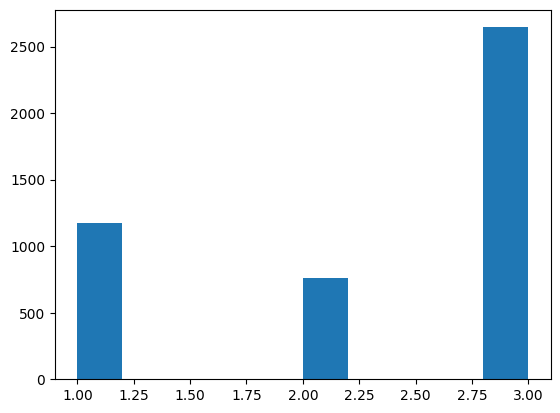

In [ ]:
plt.hist(y_train)

In [ ]:
y_train.median()

3.0

In [ ]:
three_rnd_X = three_rnd_X.join(df[['r_fighter', 'b_fighter']])

In [ ]:
three_rnd_X = accurate_stats(three_rnd_X, [['finish_round', 'r_avg_rounds']], [['finish_round', 'b_avg_rounds']], three_rnd_fighters_array)
three_rnd_X = first_fight(three_rnd_X, ['r_avg_rounds'], ['b_avg_rounds'], three_rnd_fighters_array).drop(columns = ['r_fighter', 'b_fighter'])

In [ ]:
three_rnd_X['total_avg_rounds'] = (three_rnd_X['r_avg_rounds']+three_rnd_X['b_avg_rounds'])/2

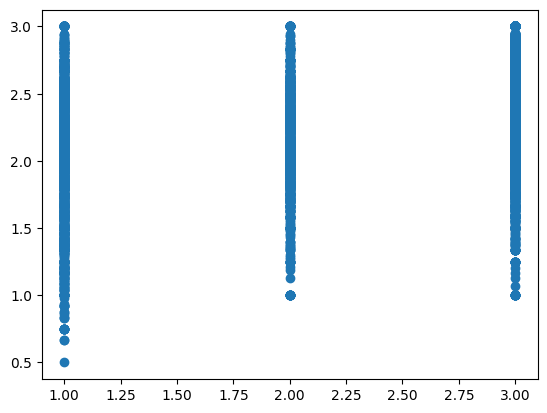

In [ ]:
plt.scatter(three_rnd_X['finish_round'], three_rnd_X['total_avg_rounds'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(three_rnd_X.drop(columns = ['finish_round']),three_rnd_X['finish_round'],test_size=0.2,random_state = 42 )

In [ ]:
def to_zero_based_int(y):
    y = np.asarray(y).reshape(-1)
    y = y.astype(np.int32)
    y = y - y.min()
    return y

y_train = to_zero_based_int(y_train)

y_test  = to_zero_based_int(y_test)

In [ ]:
n_features = X_train.shape[1]

model = Sequential([
    tf.keras.Input(shape = (n_features, )),
    Dense(units = 256, activation = 'relu'),
    Dense(units = 128, activation= 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

model.compile(loss = SparseCategoricalCrossentropy(), optimizer = Adam(learning_rate = 1e-3))

model.fit(X_train, y_train, epochs = 75)

Epoch 1/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.4478
Epoch 2/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1529
Epoch 3/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1811
Epoch 4/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0248
Epoch 5/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0438
Epoch 6/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9761
Epoch 7/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9717
Epoch 8/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9519
Epoch 9/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9594
Epoch 10/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9292
Epoch 11/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9392
Epoch 12/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9378
Epoch 13/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9116
Epoch 14/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9297
Epoch 15/75
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [ ]:
y_pred = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred_ids = y_pred.argmax(axis=1)

In [ ]:
accuracy_score(y_test, y_pred_ids)

0.5850043591979076